<a href="https://colab.research.google.com/github/raviteja1432/AI/blob/main/majorcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import shutil
import glob
import os

In [ ]:
ROOt_DIR="/content/drive/MyDrive/majorcnnimages/normaltumor"
number_of_images={}
for dir in os.listdir(ROOt_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOt_DIR,dir)))
number_of_images.items()

dict_items([('Tumor', 2270), ('Normal', 4318)])

In [ ]:
if not os.path.exists("./train1"):
  os.mkdir("./train1")
for dir in os.listdir(ROOt_DIR):
  os.makedirs("./train1/"+dir)

  for img in np.random.choice(a=os.listdir(os.path.join(ROOt_DIR, dir)),
                              size= (math.floor(70/100*number_of_images[dir])-2), replace=False):
    O = os.path.join(ROOt_DIR,dir,img)
    D= os.path.join('./train1',dir)
    shutil.copy(O,D)
    #os.remove(O)
else:
  print("train folder exist")

train folder exist


In [ ]:
def dataFolder(p, split):
  if not os.path.exists("./"+p):
   os.mkdir("./"+p)

   for dir in os.listdir(ROOt_DIR):
        os.makedirs("./"+p+"/"+dir)

   for img in np.random.choice(a=os.listdir(os.path.join(ROOt_DIR, dir)),
                              size= (math.floor(split*number_of_images[dir])-2), replace=False):
        O = os.path.join(ROOt_DIR,dir,img)
        D= os.path.join("./"+p,dir)
        shutil.copy(O,D)
       # os.remove(O)
  else:
    print(f"{p}folder exist")

In [ ]:
dataFolder("train1",0.7)

train1folder exist


In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

Model build

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
#from keras.preprocessing.image import load_img, img_to_array
from keras_preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#CNN model
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size= (3,3), activation = 'relu', input_shape=(512,512,3), padding="same" ))
model.add(Conv2D(filters= 36, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters= 64, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters= 128, kernel_size= (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 510, 510, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 253, 253, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 128)     7

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
def preprocessingImages1(path):
  image_data= ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image= image_data.flow_from_directory(directory=path, target_size=(512,512), batch_size=32,class_mode='binary')
  return image

In [ ]:
path="/content/train1"
train_data=preprocessingImages1(path)

Found 4607 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  image_data= ImageDataGenerator(rescale=1/255)
  image= image_data.flow_from_directory(directory=path, target_size=(512,512), batch_size=32,class_mode='binary')
  return image

In [ ]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 645 images belonging to 2 classes.


In [ ]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 645 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01, patience=8, verbose=1, mode= 'auto')
mc= ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1, save_best_only= True, mode='auto')
cd=[es,mc]

Model Training

In [ ]:
hs=model.fit_generator(generator= train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,validation_steps=16, callbacks= cd)

<ipython-input-42-a2c1657fb41f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator(generator= train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.1718 - accuracy: 0.9453
Epoch 1: val_accuracy did not improve from 0.99023
8/8 [==============================] - 23s 3s/step - loss: 0.1718 - accuracy: 0.9453 - val_loss: 0.1055 - val_accuracy: 0.9629
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9336
Epoch 2: val_accuracy did not improve from 0.99023
8/8 [==============================] - 26s 3s/step - loss: 0.1622 - accuracy: 0.9336 - val_loss: 0.0687 - val_accuracy: 0.9707
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9531
Epoch 3: val_accuracy did not improve from 0.99023
8/8 [==============================] - 24s 3s/step - loss: 0.1121 - accuracy: 0.9531 - val_loss: 0.0590 - val_accuracy: 0.9727
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9688
Epoch 4: val_accuracy did not improve from 0.99023
8/8 [==============================] - 22s 3s/s

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

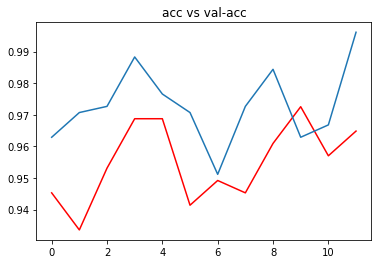

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'], c='red')
plt.plot(h['val_accuracy'])
plt.title("acc vs val-acc")
plt.show()

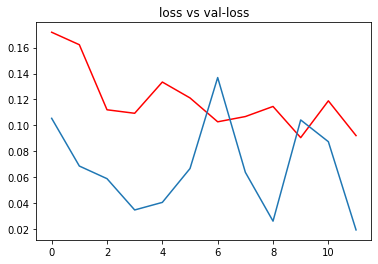

In [ ]:
plt.plot(h['loss'], c='red')
plt.plot(h['val_loss'])
plt.title("loss vs val-loss")
plt.show()

In [ ]:
#model accuracy
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

MODEL ACCURACY


In [ ]:
acc= model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100} %")

<ipython-input-48-2fb8d5c4bd2f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc= model.evaluate_generator(test_data)[1]


the accuracy of our model is 99.53488111495972 %


In [ ]:
!pip install keras --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_preprocessing.image import load_img, img_to_array

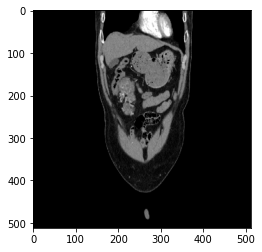

1/1 [==============================] - 0s 21ms/step
1.0
the MRI is having tumor


In [ ]:
path ="/content/drive/MyDrive/majorcnnimages/normaltumor1/normaltumor/Tumor/Tumor- (2).jpg"
img = load_img(path,target_size= (512,512))
input_arr= img_to_array(img)/255 #normalizing image
plt.imshow(input_arr)
plt.show()
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0][0]
pred=np.round(pred)
print(pred)
if pred == 1:
  print("the MRI is having tumor")
else:
  print("the MRI is not having tumor")

In [ ]:
train_data.class_indices

{'Normal': 0, 'Tumor': 1}

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam,Adamax,Nadam

In [3]:
data = pd.read_csv('/content/drive/MyDrive/majorcnnimages/kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
data=data.drop(['id'],axis=1)
data=data.drop(['age'],axis=1)
datastr=data

In [7]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [8]:
ndata = binary_encode(datastr, 'classification','ckd')

In [9]:
ndata=binary_encode(ndata,'rbc','abnormal')

In [10]:
ndata=binary_encode(ndata,'pc','abnormal')
ndata

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,0,0,notpresent,notpresent,121.0,36.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,50.0,1.020,4.0,0.0,0,0,notpresent,notpresent,NaN,18.0,...,38,6000,NaN,no,no,no,good,no,no,1
2,80.0,1.010,2.0,3.0,0,0,notpresent,notpresent,423.0,53.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,70.0,1.005,4.0,0.0,0,1,present,notpresent,117.0,56.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,80.0,1.010,2.0,0.0,0,0,notpresent,notpresent,106.0,26.0,...,35,7300,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,notpresent,notpresent,140.0,49.0,...,47,6700,4.9,no,no,no,good,no,no,0
396,70.0,1.025,0.0,0.0,0,0,notpresent,notpresent,75.0,31.0,...,54,7800,6.2,no,no,no,good,no,no,0
397,80.0,1.020,0.0,0.0,0,0,notpresent,notpresent,100.0,26.0,...,49,6600,5.4,no,no,no,good,no,no,0
398,60.0,1.025,0.0,0.0,0,0,notpresent,notpresent,114.0,50.0,...,51,7200,5.9,no,no,no,good,no,no,0


In [11]:
ndata=binary_encode(ndata,'pcc','present')

In [12]:
ndata=binary_encode(ndata,'ba','present')

In [13]:
ndata=binary_encode(ndata,'appet','poor')

In [14]:
ndata=binary_encode(ndata,'pe','yes')

In [15]:
ndata=binary_encode(ndata,'ane','yes')

In [16]:
ndata=binary_encode(ndata,'htn','yes')
ndata

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,...,44,7800,5.2,1,yes,no,0,0,0,1
1,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,...,38,6000,NaN,0,no,no,0,0,0,1
2,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,...,31,7500,NaN,0,yes,no,1,0,1,1
3,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,...,32,6700,3.9,1,no,no,1,1,1,1
4,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,...,35,7300,4.6,0,no,no,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,...,47,6700,4.9,0,no,no,0,0,0,0
396,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,...,54,7800,6.2,0,no,no,0,0,0,0
397,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,...,49,6600,5.4,0,no,no,0,0,0,0
398,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,...,51,7200,5.9,0,no,no,0,0,0,0


In [17]:
ndata=binary_encode(ndata,'dm','yes')

In [18]:
ndata=binary_encode(ndata,'cad','yes')
ndata

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,...,44,7800,5.2,1,1,0,0,0,0,1
1,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,...,38,6000,NaN,0,0,0,0,0,0,1
2,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,...,31,7500,NaN,0,1,0,1,0,1,1
3,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,...,32,6700,3.9,1,0,0,1,1,1,1
4,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,...,35,7300,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,...,47,6700,4.9,0,0,0,0,0,0,0
396,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,...,54,7800,6.2,0,0,0,0,0,0,0
397,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,...,49,6600,5.4,0,0,0,0,0,0,0
398,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,...,51,7200,5.9,0,0,0,0,0,0,0


In [19]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              388 non-null    float64
 1   sg              353 non-null    float64
 2   al              354 non-null    float64
 3   su              351 non-null    float64
 4   rbc             400 non-null    int64  
 5   pc              400 non-null    int64  
 6   pcc             400 non-null    int64  
 7   ba              400 non-null    int64  
 8   bgr             356 non-null    float64
 9   bu              381 non-null    float64
 10  sc              383 non-null    float64
 11  sod             313 non-null    float64
 12  pot             312 non-null    float64
 13  hemo            348 non-null    float64
 14  pcv             330 non-null    object 
 15  wc              295 non-null    object 
 16  rc              270 non-null    object 
 17  htn             400 non-null    int

In [20]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [21]:
ndata.pcv=le.fit_transform(ndata.pcv)

In [22]:
ndata.wc=le.fit_transform(ndata.wc)

In [23]:
ndata.rc=le.fit_transform(ndata.rc)

In [24]:
data1=ndata

In [25]:
y=ndata['classification']
datans=ndata.drop(['classification'],axis=1)
datans

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,...,15.4,32,72,34,1,1,0,0,0,0
1,50.0,1.020,4.0,0.0,0,0,0,0,NaN,18.0,...,11.3,26,56,49,0,0,0,0,0,0
2,80.0,1.010,2.0,3.0,0,0,0,0,423.0,53.0,...,9.6,19,70,49,0,1,0,1,0,1
3,70.0,1.005,4.0,0.0,0,1,1,0,117.0,56.0,...,11.2,20,62,19,1,0,0,1,1,1
4,80.0,1.010,2.0,0.0,0,0,0,0,106.0,26.0,...,11.6,23,68,27,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,0,0,140.0,49.0,...,15.7,35,62,30,0,0,0,0,0,0
396,70.0,1.025,0.0,0.0,0,0,0,0,75.0,31.0,...,16.5,42,72,44,0,0,0,0,0,0
397,80.0,1.020,0.0,0.0,0,0,0,0,100.0,26.0,...,15.8,37,61,36,0,0,0,0,0,0
398,60.0,1.025,0.0,0.0,0,0,0,0,114.0,50.0,...,14.2,39,67,41,0,0,0,0,0,0


In [26]:
from sklearn import preprocessing
x=datans.value_counts
scale=preprocessing.MinMaxScaler()
x_scaled=scale.fit_transform(datans)
df=pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.0,0.211538,0.088575,...,0.836735,0.727273,0.782609,0.693878,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.0,NaN,0.042362,...,0.557823,0.590909,0.608696,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,0.132221,...,0.442177,0.431818,0.760870,1.000000,0.0,1.0,0.0,1.0,0.0,1.0
3,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,0.139923,...,0.551020,0.454545,0.673913,0.387755,1.0,0.0,0.0,1.0,1.0,1.0
4,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,0.062901,...,0.578231,0.522727,0.739130,0.551020,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.252137,0.121951,...,0.857143,0.795455,0.673913,0.612245,0.0,0.0,0.0,0.0,0.0,0.0
396,0.153846,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.113248,0.075738,...,0.911565,0.954545,0.782609,0.897959,0.0,0.0,0.0,0.0,0.0,0.0
397,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.062901,...,0.863946,0.840909,0.663043,0.734694,0.0,0.0,0.0,0.0,0.0,0.0
398,0.076923,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.196581,0.124519,...,0.755102,0.886364,0.728261,0.836735,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.isna().sum()

0     12
1     47
2     46
3     49
4      0
5      0
6      0
7      0
8     44
9     19
10    17
11    87
12    88
13    52
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
dtype: int64

In [28]:
df.fillna(df.mean(),inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.0,0.211538,0.088575,...,0.836735,0.727273,0.782609,0.693878,1.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.0,0.269309,0.042362,...,0.557823,0.590909,0.608696,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,0.132221,...,0.442177,0.431818,0.760870,1.000000,0.0,1.0,0.0,1.0,0.0,1.0
3,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,0.139923,...,0.551020,0.454545,0.673913,0.387755,1.0,0.0,0.0,1.0,1.0,1.0
4,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,0.062901,...,0.578231,0.522727,0.739130,0.551020,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.252137,0.121951,...,0.857143,0.795455,0.673913,0.612245,0.0,0.0,0.0,0.0,0.0,0.0
396,0.153846,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.113248,0.075738,...,0.911565,0.954545,0.782609,0.897959,0.0,0.0,0.0,0.0,0.0,0.0
397,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.062901,...,0.863946,0.840909,0.663043,0.734694,0.0,0.0,0.0,0.0,0.0,0.0
398,0.076923,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.196581,0.124519,...,0.755102,0.886364,0.728261,0.836735,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
trainX,testX,trainY,testY=train_test_split(df,y,test_size=0.3,random_state=1)

In [30]:
First_Layer_Size = 64# Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(trainX.shape[1],)))
model.add(Dropout(rate=0.25))
model.add(Dense(16,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(32,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.25))
#model.add(Dense(120,activation='relu'))
#model.add(Dropout(rate=0.25))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
his = model.fit(trainX,trainY,validation_data= (testX, testY), batch_size=1,epochs=50,verbose=1)

Epoch 1/50
280/280 [==============================] - 1s 4ms/step - loss: 0.2056 - accuracy: 0.9500 - val_loss: 0.1197 - val_accuracy: 0.9417
Epoch 2/50
280/280 [==============================] - 1s 4ms/step - loss: 0.2260 - accuracy: 0.9286 - val_loss: 0.0668 - val_accuracy: 0.9917
Epoch 3/50
280/280 [==============================] - 1s 4ms/step - loss: 0.1459 - accuracy: 0.9607 - val_loss: 0.0715 - val_accuracy: 0.9750
Epoch 4/50
280/280 [==============================] - 1s 4ms/step - loss: 0.1258 - accuracy: 0.9714 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 5/50
280/280 [==============================] - 1s 4ms/step - loss: 0.1663 - accuracy: 0.9714 - val_loss: 0.0647 - val_accuracy: 0.9917
Epoch 6/50
280/280 [==============================] - 1s 3ms/step - loss: 0.1399 - accuracy: 0.9750 - val_loss: 0.0772 - val_accuracy: 0.9833
Epoch 7/50
280/280 [==============================] - 1s 3ms/step - loss: 0.1702 - accuracy: 0.9679 - val_loss: 0.0672 - val_accuracy: 0.9833
Epoch 

In [37]:
p_pred = model.predict(testX)
p_pred = p_pred.flatten()
print(p_pred.round(2))


4/4 [==============================] - 0s 3ms/step
[0.   1.   0.06 0.   1.   0.   1.   0.   1.   0.   1.   0.   0.98 0.03
 0.   1.   0.   1.   1.   1.   1.   1.   0.   1.   1.   1.   0.   1.
 0.   1.   1.   1.   1.   0.   1.   1.   1.   0.98 0.   1.   0.   1.
 1.   1.   0.   1.   0.   0.   0.   0.   1.   1.   1.   1.   0.   0.
 0.   0.18 0.   0.   1.   1.   1.   1.   0.   1.   1.   0.   0.   0.03
 1.   1.   0.   0.   1.   0.   1.   1.   1.   1.   1.   1.   0.   1.
 1.   1.   0.   1.   0.   1.   1.   0.   0.04 0.   1.   0.   0.   0.
 0.   1.   1.   0.   1.   1.   0.94 0.   1.   1.   0.   0.   1.   0.
 1.   1.   1.   1.   0.   1.   1.   0.  ]


In [38]:
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 1 1 0]


In [39]:
print(confusion_matrix(testY, y_pred))

[[50  0]
 [ 1 69]]


In [40]:
p_pred_train = model.predict(trainX)
p_pred_train = p_pred_train.flatten()
print(p_pred_train.round(2))

9/9 [==============================] - 0s 2ms/step
[1.   1.   0.   1.   0.   1.   1.   1.   0.   0.   0.   0.   0.   0.
 0.   0.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   0.99 0.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.
 0.   1.   0.   1.   1.   0.05 1.   1.   0.   0.01 0.19 0.   0.99 1.
 0.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   0.02 1.
 0.   1.   1.   1.   0.   1.   1.   0.   1.   1.   0.09 1.   0.01 0.
 0.   1.   1.   1.   1.   1.   0.01 1.   0.   0.   0.   1.   0.   1.
 0.   1.   1.   1.   1.   1.   1.   0.   0.   0.   0.   0.   0.   1.
 1.   1.   0.   1.   0.99 1.   1.   0.   1.   1.   1.   1.   1.   1.
 1.   0.   1.   1.   0.02 1.   1.   1.   1.   0.   1.   1.   0.   0.
 0.   1.   1.   1.   0.   0.   0.   1.   1.   1.   1.   0.   1.   0.
 1.   1.   1.   1.   0.6  0.   1.   1.   1.   0.   1.   1.   1.   1.
 1.   1.   1.   0.   1.   0.   1.   1.   1.   1.   0.   1.   0.   1.
 0.   1.   1.   1.   0.   0.   1.   0.   1.   1.   0

In [41]:
y_pred_train = np.where(p_pred_train > 0.5, 1, 0)
print(y_pred_train)

[1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0
 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0]


In [42]:
print(confusion_matrix(trainY, y_pred_train))

[[102   0]
 [  0 178]]


In [43]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

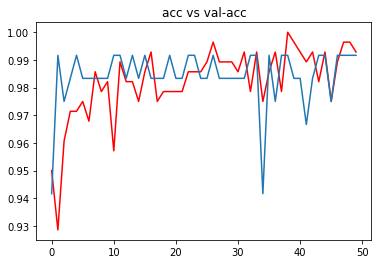

In [44]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'], c='red')
plt.plot(h['val_accuracy'])
plt.title("acc vs val-acc")
plt.show()

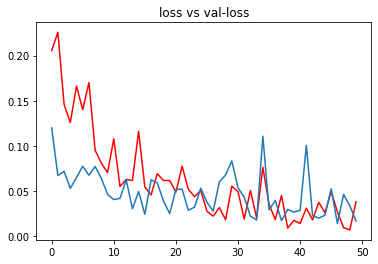

In [45]:
import matplotlib.pyplot as plt
plt.plot(h['loss'], c='red')
plt.plot(h['val_loss'])
plt.title("loss vs val-loss")
plt.show()

In [46]:
model.save("Binary_Model.h5")